In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df3 = pd.read_csv("C:/Users/chinm/Downloads/diamonds.csv")

In [7]:
df3.shape

(53940, 11)

In [8]:
df3.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [10]:
df3.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
# Unnamed is just index. Drop it

df3 = df3.drop(columns=['Unnamed: 0'])

In [12]:
df3.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
# x, y and z shouldn't have 0 values since they are size in mm. Must be missing values
# Let's check how many there are

print((df3['x'] == 0).sum())
print((df3['y'] == 0).sum())
print((df3['z'] == 0).sum())

# Very few values missing. I'm removing them
df3 = df3[(df3['x'] != 0) & (df3['y'] != 0) & (df3['z'] != 0)]

8
7
20


In [14]:
# check for other missing values

df3.isnull().sum(axis=0)
df3.isna().sum(axis=0)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [15]:
# No missing data
# Describe again

df3.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [16]:
# Now lets check unique counts of categorical variables 

df3[['cut', 'color', 'clarity']].nunique()

cut        5
color      7
clarity    8
dtype: int64

In [17]:
print(df3['cut'].unique())
print(df3['color'].unique()) 
print(df3['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [18]:
# Not a lot of values, we can one hot encode them

df3_1hot = pd.get_dummies(df3, drop_first=True)

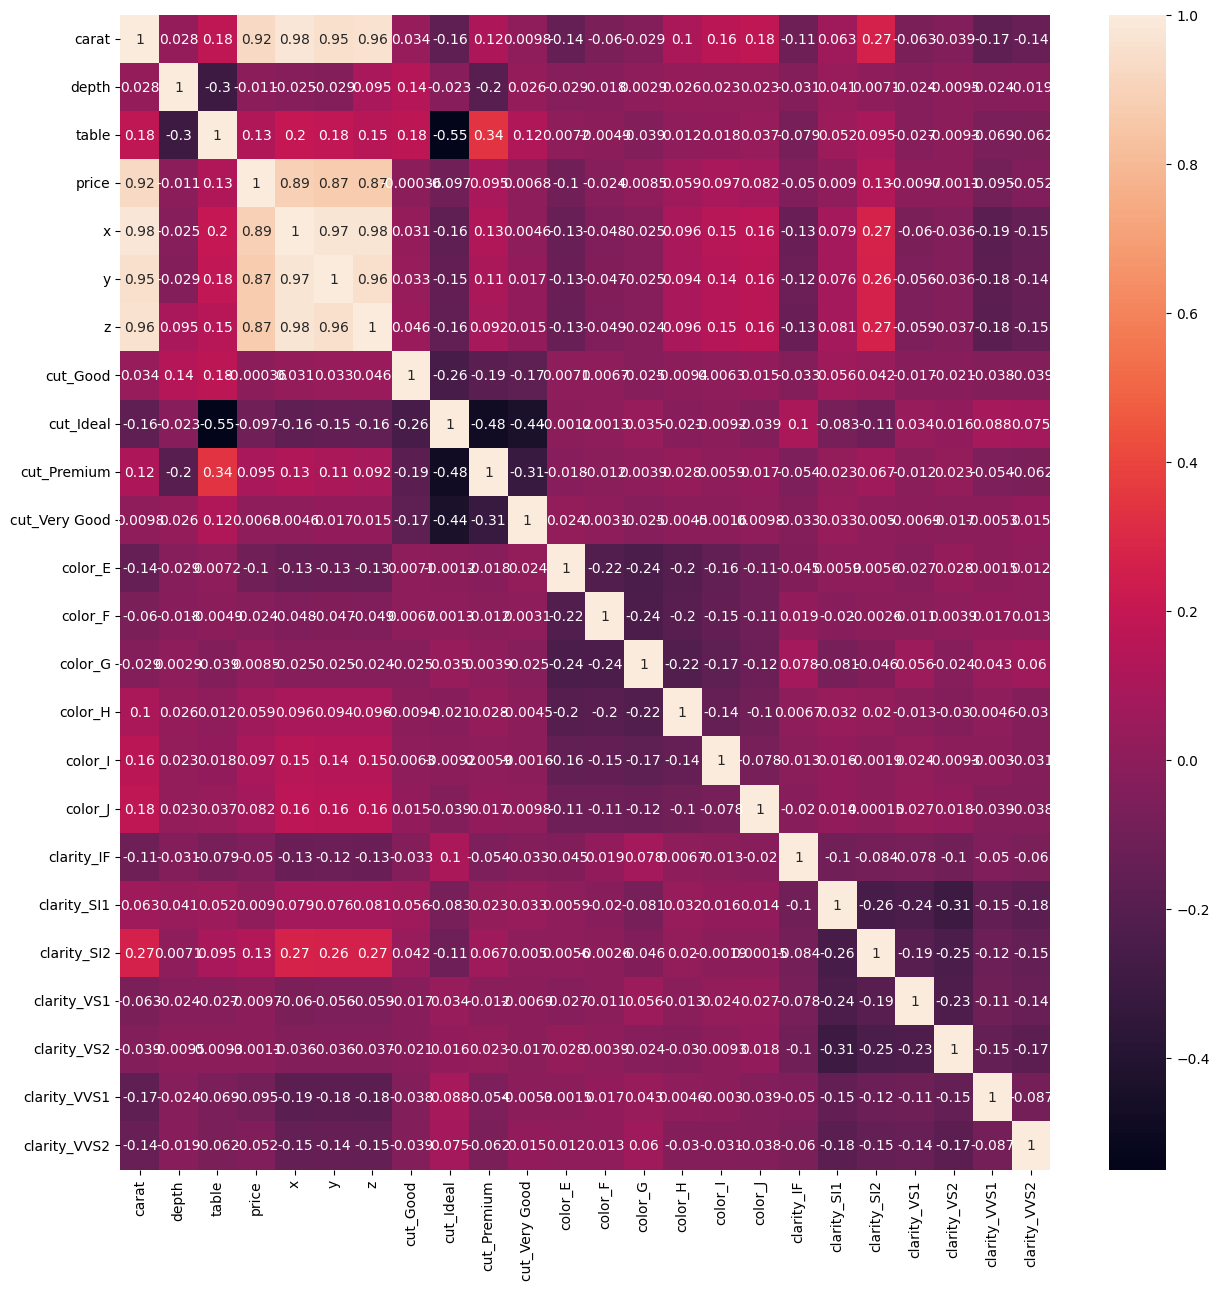

In [19]:
# Now we can check correlation plot
plt.figure(figsize=(15,15))
sns.heatmap(df3_1hot.corr(), annot=True)
plt.show()

In [20]:
# Very obvious correlation in x, y and z
# Strong positive correlation in size(x, y, z), carat and price

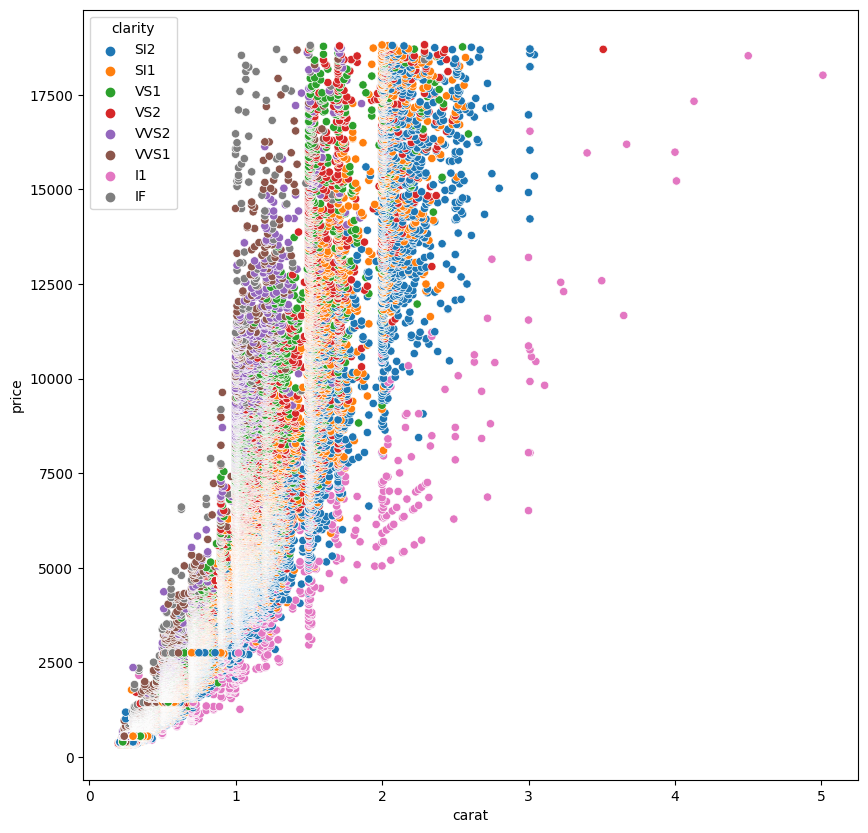

In [21]:
# Not very clear from above whether clarity, color and cut have any relationship with price
# Lets check that from the original data

plt.figure(figsize=(10,10))
sns.scatterplot(x='carat', y='price', data=df3, hue='clarity')
plt.show()

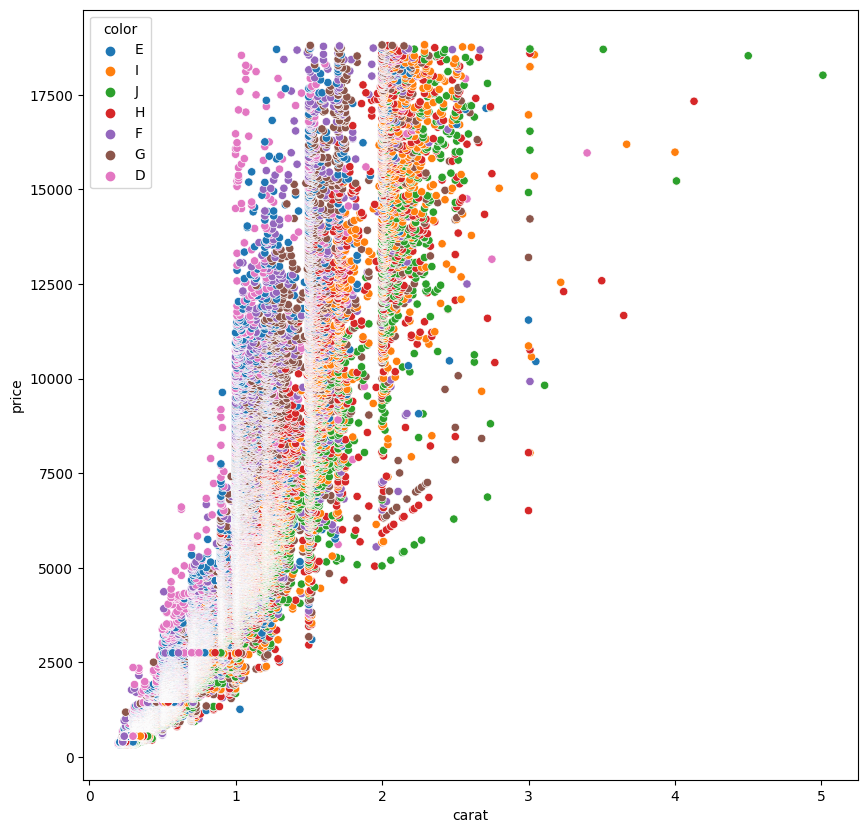

In [22]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='carat', y='price', data=df3, hue='color')
plt.show()

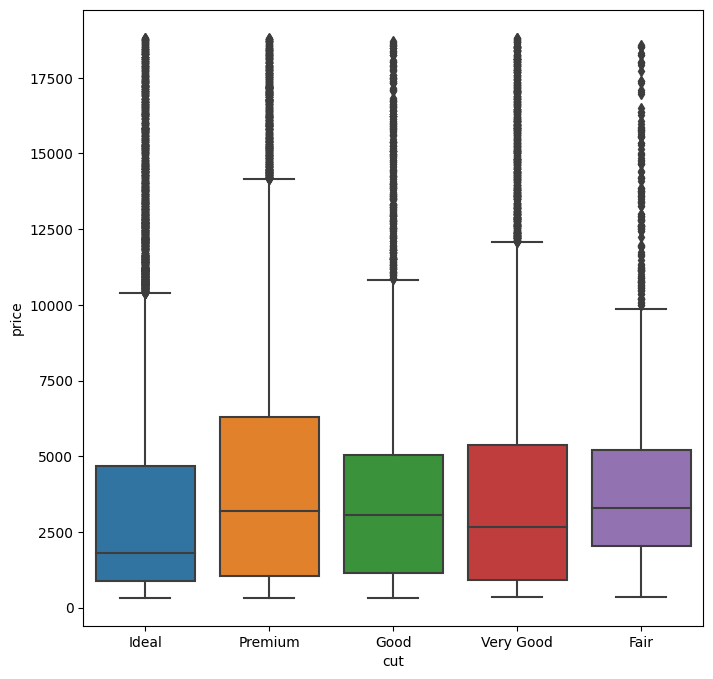

In [23]:
# For cut, we can just check the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(x='cut', y='price', data=df3)
plt.show()

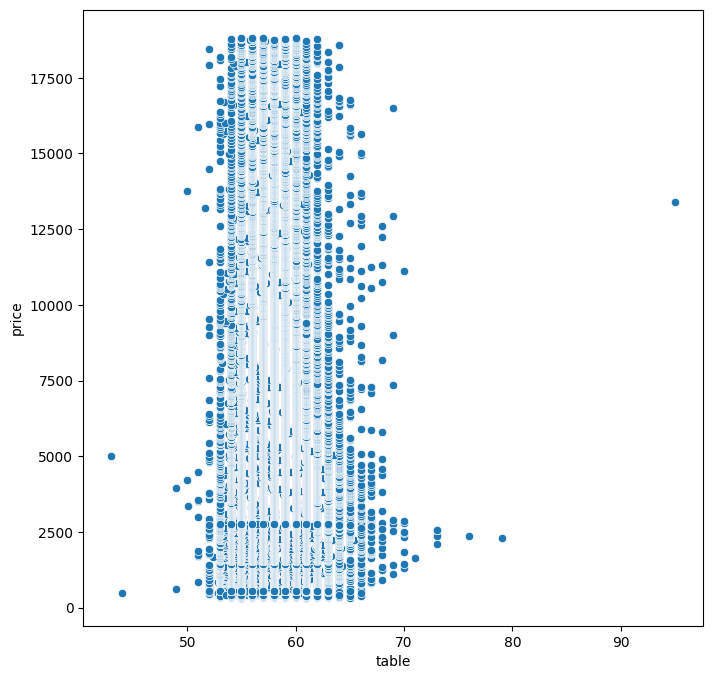

In [24]:
# Any relationship between price and table

plt.figure(figsize=(8,8))
sns.scatterplot(x='table', y='price', data=df3)
plt.show()

In [25]:
# No everything is very uniform

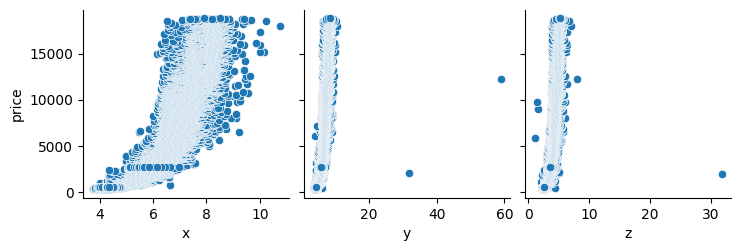

In [26]:
# Lets draw some pairplots to verify the relationship between price and x, y, z

sns.pairplot(x_vars=['x','y','z'], y_vars=['price'], data=df3)
plt.show()